<a href="https://colab.research.google.com/github/AhsanA3/Financial-Fraud-Analysis/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the dataset (transactions.csv) as a Pandas dataframe
def exercise_0(file):
    df = pd.read_csv(file)
    return df

#Return the column names as a list from the dataframe
def exercise_1(df):
    return df.columns.tolist()

#Return the first k rows from the dataframe
def exercise_2(df, k):
    return df.head(k)

#Return a random sample of k rows from the dataframe
def exercise_3(df, k):
    return df.sample(k)

#Return a list of the unique transaction types
def exercise_4(df):
    return df['type'].unique().tolist()

#Return a Pandas series of the top 10 transaction destinations with frequencies
def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

#Return all the rows from the dataframe for which fraud was detected
def exercise_6(df):
    return df[df['isFraud'] == 1]

#Return a dataframe that contains the number of distinct destinations that each source has interacted with, sorted in descending order
def exercise_7(df):
    return df.groupby('nameOrig')['nameDest'].nunique().sort_values(ascending=False).reset_index()

def visual_1(df):
    pass

def visual_2(df):
    pass

def exercise_custom(df):
    pass

def visual_custom(df):
    pass

In [7]:
df = exercise_0('transactions.csv')

In [8]:
# Test the functions
file_path = 'transactions.csv'  # Update with the correct file path if needed
df = exercise_0(file_path)
print("Column names:", exercise_1(df))
print("\nFirst 5 rows:")
print(exercise_2(df, 5))
print("\nRandom sample of 5 rows:")
print(exercise_3(df, 5))
print("\nUnique transaction types:", exercise_4(df))
print("\nTop 10 transaction destinations with frequencies:")
print(exercise_5(df))
print("\nRows for which fraud was detected:")
print(exercise_6(df))
print("\nBonus: Distinct destinations for each source:")
print(exercise_7(df))


Column names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  

Create graphs for the following.
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes

The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

In [30]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()

    def transaction_counts_split_by_fraud(df):
        return df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)

    fig, axs = plt.subplots(2, figsize=(10, 10))

    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Bar Chart')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Count')

    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar', stacked=True)
    axs[1].set_title('Transaction Types Split by Fraud Bar Chart')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Count')

    fig.suptitle('Transaction Types Analysis')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    for ax in axs:
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

    return

    visual_1(df)

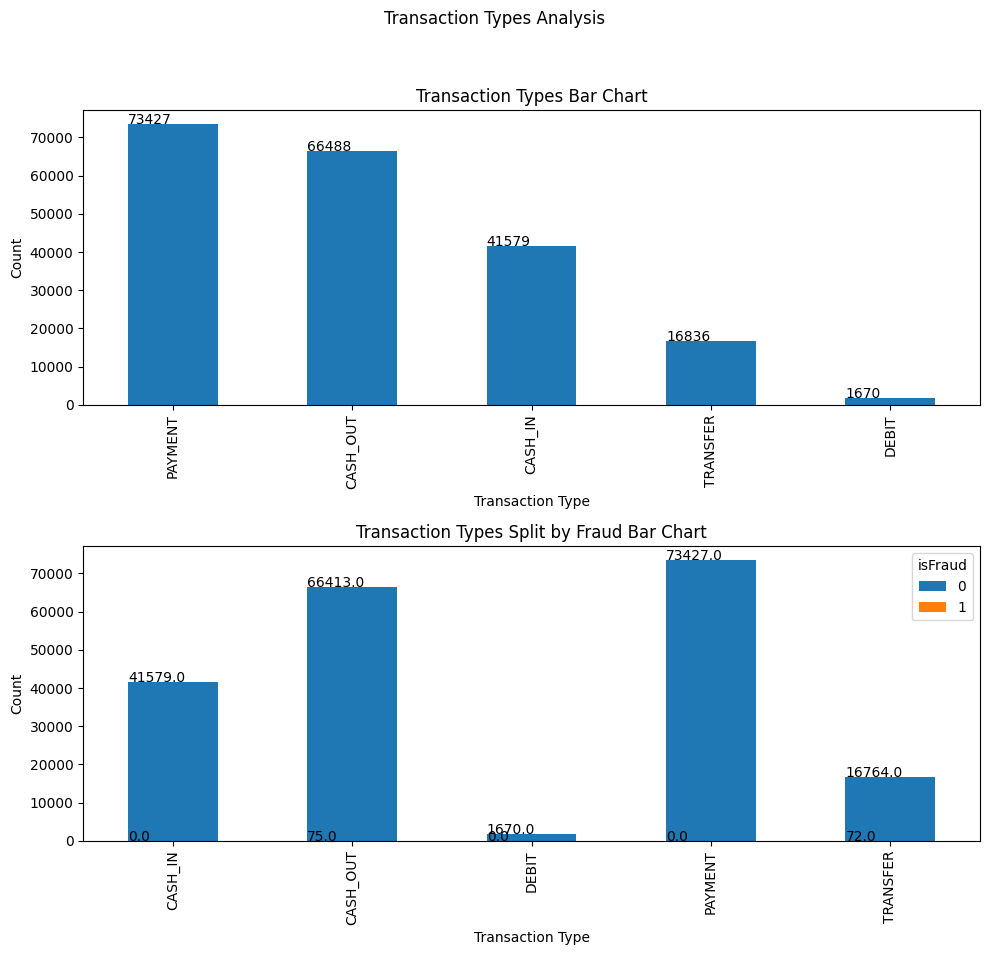

In [29]:
# Test the function
visual_1(df)

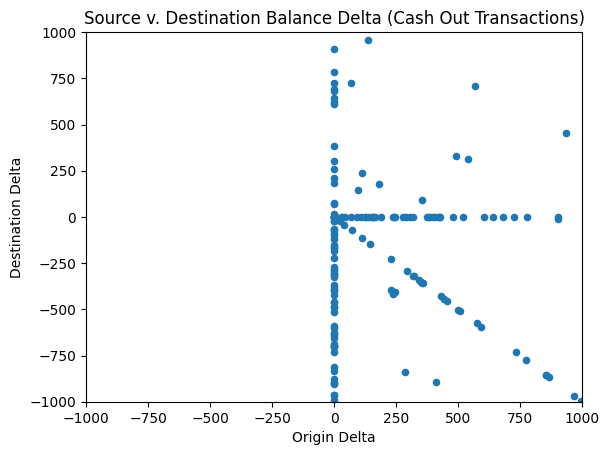

In [21]:
def visual_2(df):
    def query(df):
        df['Origin Delta'] = df['oldbalanceOrg'] -	df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -	df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Origin Delta',y='Destination Delta')
    plot.set_title('Source v. Destination Balance Delta (Cash Out Transactions)')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return

visual_2(df)

Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

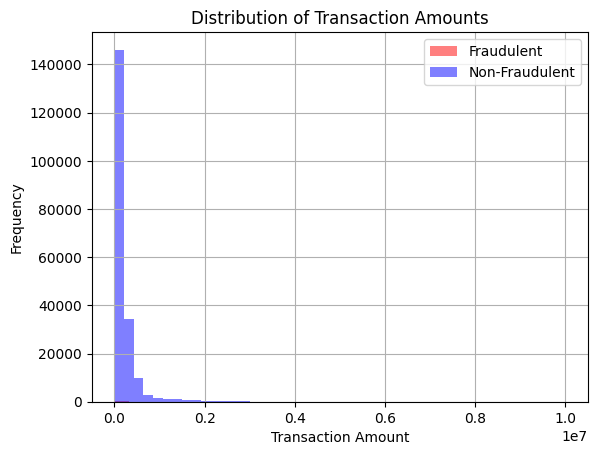

'This histogram compares the distribution of transaction amounts for fraudulent and non-fraudulent transactions.'

In [31]:
import matplotlib.pyplot as plt

def exercise_custom(df):
    # Filter the DataFrame to include only fraudulent transactions
    fraud_df = df[df['isFraud'] == 1]

    # Filter the DataFrame to include only non-fraudulent transactions
    non_fraud_df = df[df['isFraud'] == 0]

    return fraud_df, non_fraud_df

def visual_custom(df):
    fraud_df, non_fraud_df = exercise_custom(df)

    # Plot a histogram for fraudulent transactions
    plt.hist(fraud_df['amount'], bins=30, alpha=0.5, color='red', label='Fraudulent')

    # Plot a histogram for non-fraudulent transactions
    plt.hist(non_fraud_df['amount'], bins=30, alpha=0.5, color='blue', label='Non-Fraudulent')

    plt.title('Distribution of Transaction Amounts')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    return 'This histogram compares the distribution of transaction amounts for fraudulent and non-fraudulent transactions.'

# Test the function
visual_custom(df)


Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.